# ***APTOS 2019 Diabetic Retinopathy Classification Exploratory Data Analysis***

# ***Understanding the Image Characteristics and Class Distributions in APTOS 2019 Dataset***

## ***Project by: Syed Hammad Javed(F21-0634) & Fahad Akhlaq(F21-0634)***
# ***Supervised by: Dr Habib Akbar***




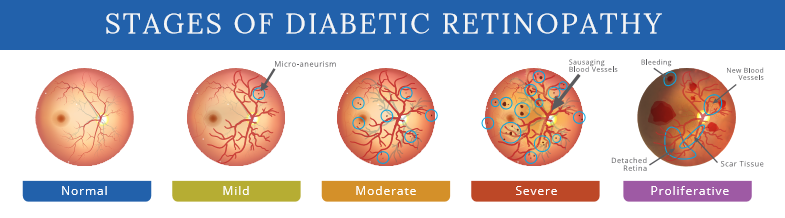

# ***IMORTING DRIVE INTO COLAB NOTEBOOK TO EXCESS APTOS 19 DATASET***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***IMPORTING USEFUL LIBRARIES***



- **`numpy`**: Array & math operations  
- **`pandas`**: Data handling & analysis  
- **cv2**: Image processing  
- **`os`**: File system access  
- **`matplotlib.pyplot`**: Data visualization  
- **`seaborn`**: Statistical plots  
- **`PIL.Image`**: Image manipulation  
- **`tqdm.notebook`**: Progress bar


In [92]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import collections
from tqdm.notebook import tqdm

# ***IMPORTING DATASET INTO NOTEBOOK***

In [8]:
train_images = '/content/drive/MyDrive/aptos2019/train_images'
test_images = '/content/drive/MyDrive/aptos2019/test_images'

# ***READING & EXPLORING APTOS-19 DATASET FOR BETTER UNDERSTANDING***

***READING "train.csv" DATA...***

In [4]:
train = pd.read_csv('/content/drive/MyDrive/aptos2019/train.csv')
train.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


***READING 'test.csv" DATA...***

In [5]:
test = pd.read_csv('/content/drive/MyDrive/aptos2019/test.csv')
test.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


***CHECKING TRAIN & TEST SAMPLES IN APTOS19 DATASET...***

In [6]:
print('Number of train samples: ', train.shape[0])
print('Number of test samples: ', test.shape[0])

Number of train samples:  3662
Number of test samples:  1928


In [38]:
train['diagnosis'].value_counts().sort_index()


,count
diagnosis,
0,1805
1,370
2,999
3,193
4,295


***FUNCTION FOR EXTRACTING IMAGE SHAPES IN APTOS19 DATASET***

In [11]:
def extract_image_shapes(id_codes, image_path):
    shapes = []
    for image_id in tqdm(id_codes, desc="Extracting image shapes"):
        image = Image.open(os.path.join(image_path, f"{image_id}.png"))
        shapes.append(np.array(image).shape)
    return shapes



***FUNCTION FOR EXTRACTING IMAGE SIZES IN APTOS19 DATASET***

In [12]:
def extract_image_sizes(id_codes, image_path):
    """
    Returns list of file sizes in bytes for given image IDs.
    """
    sizes = []
    for image_id in tqdm(id_codes, desc="Extracting image sizes"):
        file_path = os.path.join(image_path, f"{image_id}.png")
        sizes.append(os.stat(file_path).st_size)
    return sizes


***FUNCTION FOR MERGING IMAGE SHAPES & SIZES IN THEIR RESPECTIVE DIRECTORIES***

In [13]:
def enrich_with_image_metadata(df, image_path):
    """
    Adds image shape and size columns to the dataframe.
    """
    df = df.copy()
    df["image_shape"] = extract_image_shapes(df["id_code"].tolist(), image_path)
    df["image_size"] = extract_image_sizes(df["id_code"].tolist(), image_path)
    return df



In [15]:
train = enrich_with_image_metadata(train, train_images)
test = enrich_with_image_metadata(test, test_images)

Extracting image shapes:   0%|          | 0/3662 [00:00<?, ?it/s]

Extracting image sizes:   0%|          | 0/3662 [00:00<?, ?it/s]

Extracting image shapes:   0%|          | 0/1928 [00:00<?, ?it/s]

Extracting image sizes:   0%|          | 0/1928 [00:00<?, ?it/s]

In [19]:
for df in [train, test]:
    df["height"] = df["image_shape"].apply(lambda x: x[0] if isinstance(x, (tuple, list)) else None)
    df["width"] = df["image_shape"].apply(lambda x: x[1] if isinstance(x, (tuple, list)) else None)
    df["width_height_ratio"] = df["height"] / df["width"]


In [21]:
train.tail(20)

,id_code,diagnosis,image_shape,image_size,height,width,width_height_ratio
3642,fecf4c5ae84b,1,"(1736, 2416, 3)",1704075,1736,2416,0.718543
3643,fed5bb685832,0,"(1050, 1050, 3)",1033170,1050,1050,1.000000
3644,fefded6bf135,0,"(1958, 2588, 3)",5164299,1958,2588,0.756569
3645,ff03f74667df,0,"(1536, 2048, 3)",1910238,1536,2048,0.750000
3646,ff0740cb484a,2,"(1000, 1504, 3)",1332868,1000,1504,0.664894
3647,ff1e940105f9,0,"(1050, 1050, 3)",949217,1050,1050,1.000000
3648,ff344e5c9341,2,"(2136, 3216, 3)",2250953,2136,3216,0.664179
3649,ff4832d55461,0,"(1536, 2048, 3)",1804739,1536,2048,0.750000
3650,ff4955e76894,0,"(1736, 2416, 3)",2333015,1736,2416,0.718543
3651,ff4cd992667b,0,"(1958, 2588, 3)",5348220,1958,2588,0.756569


In [22]:
test.tail(20)

,id_code,image_shape,image_size,height,width,width_height_ratio
1908,fd7cc592106e,"(480, 640, 3)",221311,480,640,0.750000
1909,fd8e6b0b2e45,"(480, 640, 3)",212846,480,640,0.750000
1910,fda8612fcc8c,"(480, 640, 3)",223441,480,640,0.750000
1911,fdde61dd1bde,"(1736, 2416, 3)",2421690,1736,2416,0.718543
1912,fde8778182af,"(480, 640, 3)",212509,480,640,0.750000
1913,fe0a340c4477,"(480, 640, 3)",250941,480,640,0.750000
1914,fe190d618acf,"(480, 640, 3)",242610,480,640,0.750000
1915,fe1d2f703efc,"(480, 640, 3)",221618,480,640,0.750000
1916,fe5618ad2460,"(480, 640, 3)",215903,480,640,0.750000
1917,fe57ff56618e,"(480, 640, 3)",214090,480,640,0.750000


In [94]:
# Save modified train and test data to new CSV files
train.to_csv('train_modified.csv', index=False)
test.to_csv('test_modified.csv', index=False)


***DOING VISUALIZATION FOR UNDERSTANDING THE DATASET DISTRIBUTION, IMAGE QUALITY***

***Funtion for displaying images from training dataset***

In [42]:
def show_images_per_class(train_images, df, num=6):
    """
    Display `num` images for each class from the dataset.

    Parameters:
    - image_path (str): Path to the folder containing images.
    - df (DataFrame): DataFrame containing 'id_code' and 'diagnosis'.
    - num (int): Number of images to show per class.
    """
    classes = sorted(train['diagnosis'].unique())

    for cls in classes:
        cls_df = train[train['diagnosis'] == cls].reset_index(drop=True)
        plt.figure(figsize=(15, 3))
        for i in range(num):
            img_id = cls_df.iloc[i]["id_code"]
            img = Image.open(os.path.join(train_images, img_id + ".png"))

            plt.subplot(1, num, i + 1)
            plt.imshow(img)
            plt.title(f"Class {cls}")
            plt.axis("off")

        plt.suptitle(f"Class {cls} - Showing {num} images", fontsize=14)
        plt.tight_layout()
        plt.show()


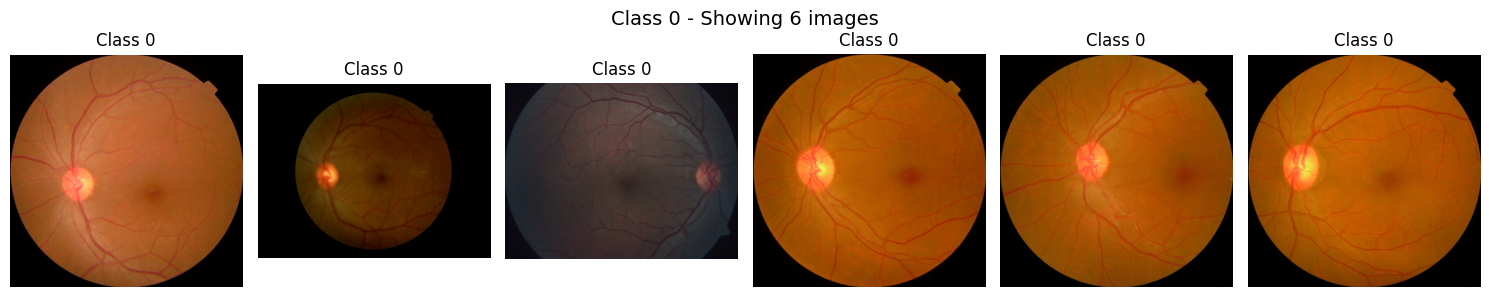

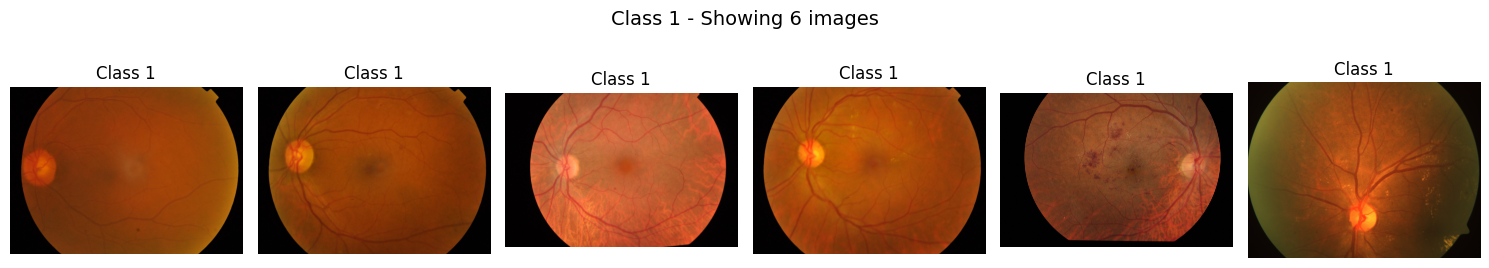

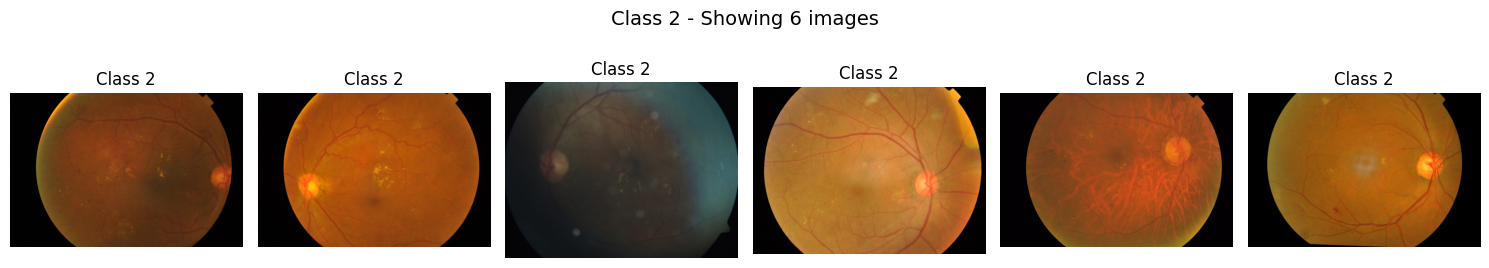

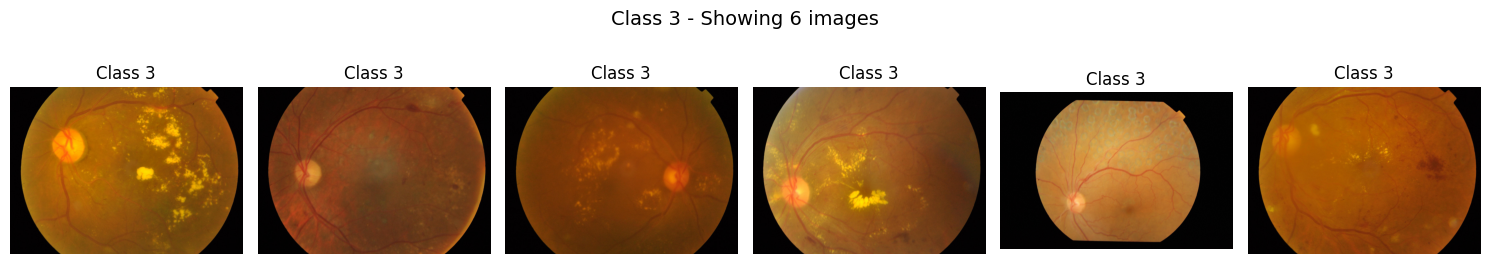

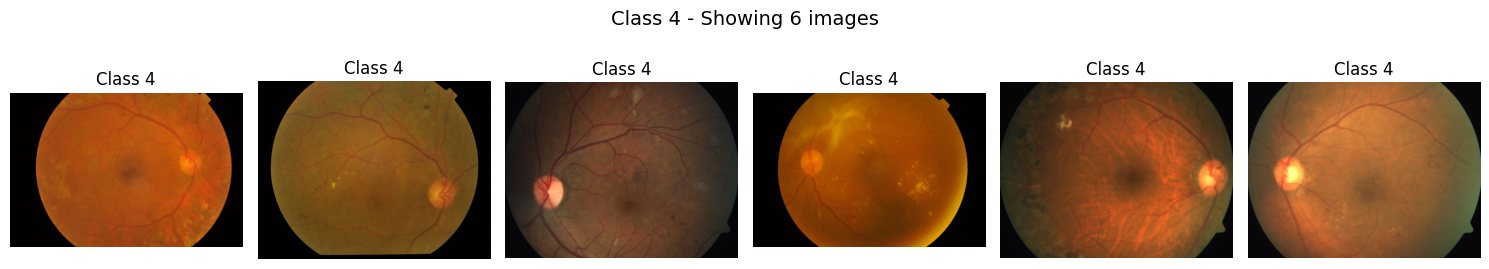

In [44]:
num = 6
show_images_per_class(train_images, train, num)


***Funtion for displaying images from test dataset...***

In [51]:
def show_test_images(image_path, df, num):
    """
    Display random `num` images from the test set (no labels).

    Parameters:
    - image_path (str): Path to test image folder.
    - df (DataFrame): Test dataframe containing 'id_code'.
    - num (int): Number of images to display.
    """
    sample_ids = random.sample(df["id_code"].tolist(), num)

    plt.figure(figsize=(15, 5))
    for i, img_id in enumerate(sample_ids):
        img = Image.open(os.path.join(image_path, img_id + ".png"))
        plt.subplot(3, int(num / 3), i + 1)
        plt.imshow(img)
        plt.title(f"{img_id}")
        plt.axis("off")

    plt.suptitle(f"Random {num} Test Images", fontsize=16)
    plt.tight_layout()
    plt.show()


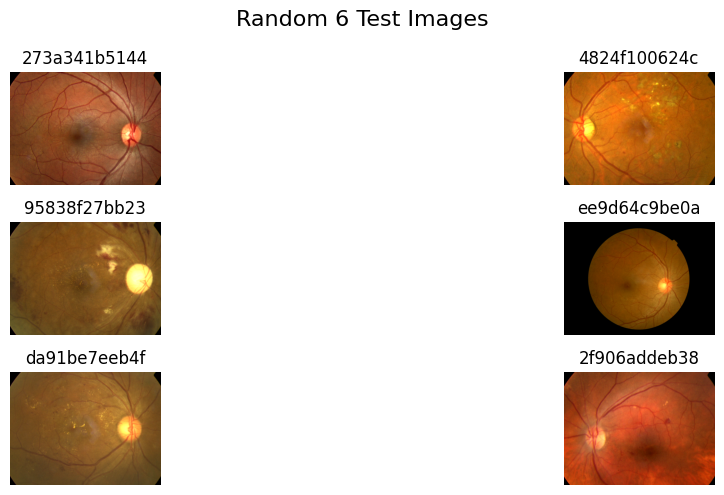

In [55]:
show_test_images(test_images, test, num=6)

## ***Distribution of images in each class...***

<ipython-input-70-29670bcff613>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x for x in range(5)],y=[train['diagnosis'].value_counts()[x] for x in range(5)],palette='Accent', ax=ax) #bar plot


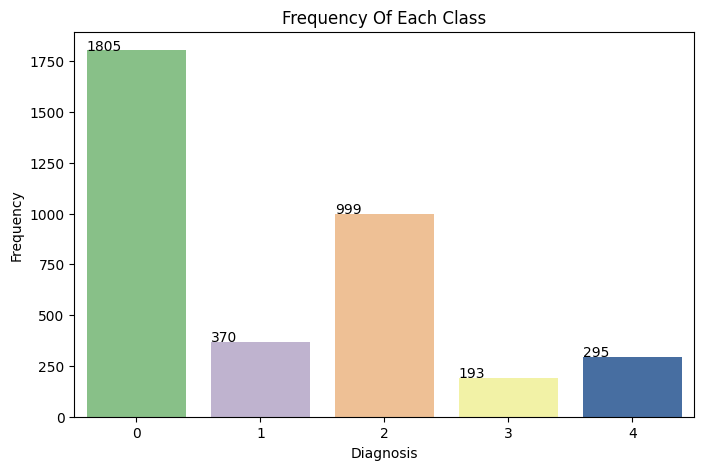

In [70]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=[x for x in range(5)],y=[train['diagnosis'].value_counts()[x] for x in range(5)],palette='Accent', ax=ax) #bar plot
for p in ax.patches: #putting counts on top of bars
   ax.annotate('{}'.format(int(p.get_height())), (p.get_x(), p.get_height()))
plt.ylabel('Frequency') #adding y axis label
plt.xlabel('Diagnosis') #adding x axis label
plt.title('Frequency Of Each Class') #adding title
plt.show()

***Distribution of Images Heights***

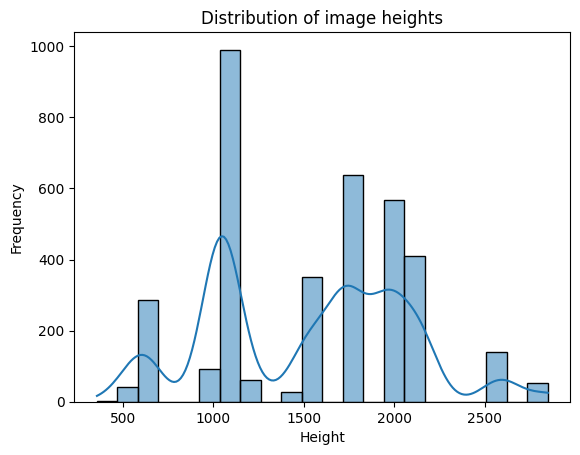

In [80]:
sns.histplot (train['height'], kde=True) #histogram for visualizing image heights
plt.ylabel('Frequency') #adding y axis label
plt.xlabel('Height') #adding x axis label
plt.title('Distribution of image heights') #adding title
plt.show()

Image heights are distributed between 250 to 2750 pixels with the most common image height being 1000 pixels (approximate).



***Distribution of Image Widths***

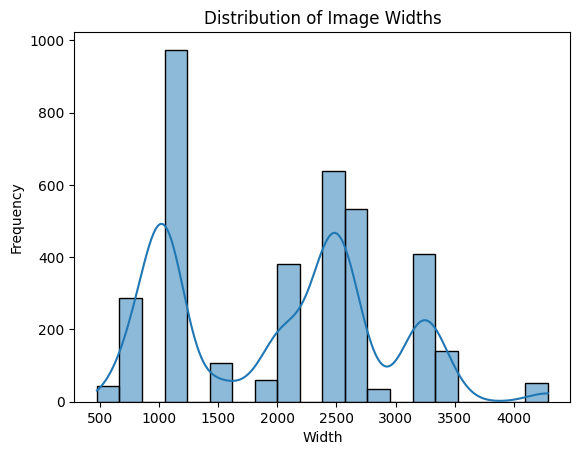

In [77]:
sns.histplot(x=train['width'], kde=True)
plt.ylabel('Frequency')
plt.xlabel('Width')
plt.title('Distribution of Image Widths')
plt.show()

Image widths are distributed between 500 to 4250 pixels with the most common image width being 1000 pixels (approximate).

***Distribution Of Width-Height Ratio***

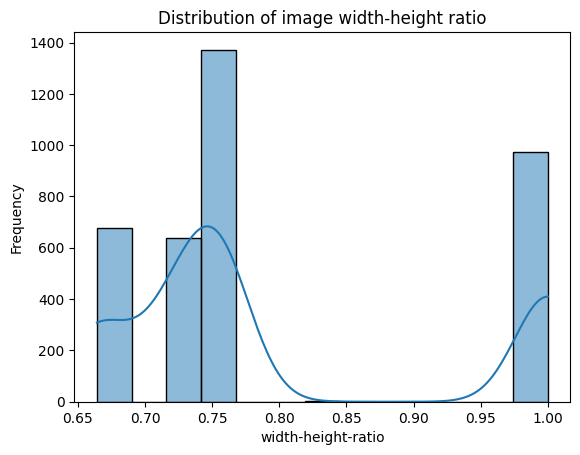

In [83]:

sns.histplot(train['width_height_ratio'], kde=True)
plt.ylabel('Frequency')
plt.xlabel('width-height-ratio')
plt.title('Distribution of image width-height ratio')
plt.show()

Most images have an aspect ratio of 0.75 or 3:4.

***Number of images of each size for a given class***



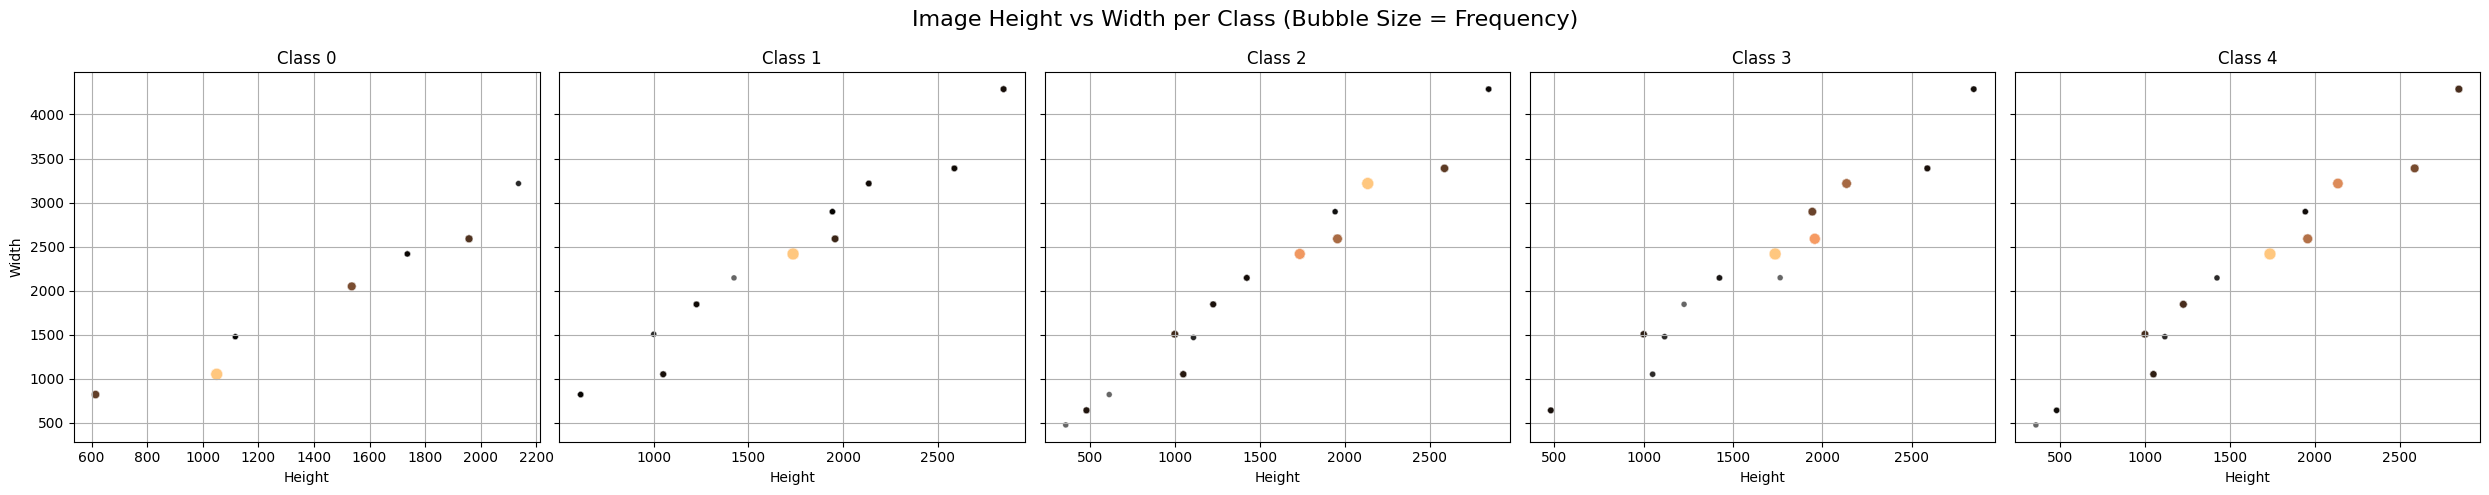

In [93]:
# Create a subplot layout (1 row, 5 columns)
fig, axs = plt.subplots(1, 5, figsize=(25, 5), sharey=True)
fig.suptitle('Image Height vs Width per Class (Bubble Size = Frequency)', fontsize=16)

# Loop over each DR class (0–4)
for class_id in range(5):
    # Filter for that class
    class_df = train[train['diagnosis'] == class_id]

    # Get list of (height, width) tuples
    merged = list(zip(class_df['height'], class_df['width']))

    # Count frequency of each unique (height, width) pair
    freq = Counter(merged)

    # Separate back into lists for plotting
    heights = [dim[0] for dim in merged]
    widths = [dim[1] for dim in merged]
    sizes = [freq[dim] * 10 for dim in merged]  # Scale bubble size for better visibility

    # Plot bubble chart
    sns.scatterplot(ax=axs[class_id], x=heights, y=widths, size=sizes, hue=sizes,
                    palette='copper', legend=False, alpha=0.6)

    axs[class_id].set_title(f'Class {class_id}')
    axs[class_id].set_xlabel('Height')
    if class_id == 0:
        axs[class_id].set_ylabel('Width')
    axs[class_id].grid(True)

plt.tight_layout()
plt.show()


# ***Summary of Key Insights from Exploratory Data Analysis***

The points key points taken from exploratory data analysis of Aptos-19 dataset are stated below:

*   Aptos19 dataset is highly unbalanced where Class 0 (no diabetic rethinopathy) dominates and Class 3(Severe) is least dominated with only 193 samples .Which means we have to downsampled class zero and upsampled other classes with the help of different techniques like augmentation etc.

*   Class 0 has 49.3% distribution and Class1,2,3,4 combined has a distribution of 50.7%. Which means binary classification will attain higher accuracy while  multi-class classification will be very low if not taken care of the class imbalance.

*  In training dataset cotton wool and hard exudus are easier to find. Hermorrages and aneursym are hard to identify which can be fixed high resolution images.

*   In test dataset we noticed the images are zoomed in mostly.


*   The images are almost perfect for Training the neural networks.



# ***What we have to do in Preprocessing for better results:***



1.   Resizing images  
2.   Cropping dark area around the fundus
3.   Augmentation to handle imbalance





